<a href="https://colab.research.google.com/github/alirezasaeednia/universityprojects/blob/main/projectAI4021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from nltk.stem import  PorterStemmer
from sklearn.linear_model import LogisticRegression
from nltk import pos_tag
from gensim.models import Word2Vec


nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
def extractcsv():
  df = pd.read_csv('/content/drive/MyDrive/dataset.csv', encoding='utf-8')
  return df


In [55]:
def tolowercase(df):
 df = df.apply(lambda x: x.astype(str).str.lower())
 return df

In [56]:
def remove_numbers(text):
    tokens = word_tokenize(str(text))
    tokens_without_numbers = [word for word in tokens if not word.isdigit()]
    text = ' '.join(tokens_without_numbers)
    return text

In [57]:
def remove_symbols(df):
    symbols = '!”#$%&’()*+,/:;<=>?@[\]``^_`{|}~.-'
    tokens = word_tokenize(df)
    tokens_without_symbols = [word for word in tokens if word not in symbols]
    df = ' '.join(tokens_without_symbols)
    df = df.replace('.', ' ').replace('-', ' ')
    df = df.replace("'", '')
    df = df.replace(".<br /><br />", "")
    return df

In [58]:
def remove_urls(df):
    for column in df.columns:
        df[column] = df[column].apply(lambda text: re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text))
    return df

In [59]:
def pre_process_ebtedaii(df):
  df=tolowercase(df)
  df=remove_urls(df)

  for column in df.columns:
    df[column]=df[column].apply(remove_numbers)

  for column in df.columns:
    df[column]=df[column].apply(remove_symbols)

  return df


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
def extracttextdata(df):
  text_data = df['comment'].tolist()
  return text_data

In [62]:
def transform_into_bag_of_words(df,text_data):
  vectorizer = CountVectorizer()
  vectorizer.fit(df)
  bag_of_words = vectorizer.transform(text_data)
  return bag_of_words

In [125]:
import pickle
def knn(bag_of_words,df,number):
  X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['sentiment'], test_size=0.3, random_state=42)
  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
  grid_search = GridSearchCV(knn, param_grid, cv=5)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  best_knn = KNeighborsClassifier(**best_params)
  best_knn.fit(X_train, y_train)
  y_pred = best_knn.predict(X_test)
  if (number==1):
    with open('kNN.pkl','wb') as f:
       pickle.dump(best_knn,f)
  print(analysis(y_test,y_pred))
  return y_pred


In [64]:
def analysis(labels,predictions):
  print( "Classification \n",classification_report(labels,predictions,target_names=["positive","negative"]))
  print("confusion\n",confusion_matrix(labels,predictions))
  print("accuracy: \n",accuracy_score(labels,predictions))

In [65]:
def clean_tokenization(review_text):
  return word_tokenize(review_text)

In [66]:
def without_anything_knn_logistic_littlehyper(df):
  df=extractcsv()
  df_without_preprocess=df
  text_data_ebtedaii=extracttextdata(df_without_preprocess)
  bag_of_words2 = transform_into_bag_of_words(df_without_preprocess,text_data_ebtedaii)
  y_pred=knn_no_hyper(bag_of_words2,df_without_preprocess)
  y_pred=logistic_regression_no_hyper(bag_of_words2,df_without_preprocess)
  return



In [67]:
def ebtedaii_knn_logistic_littlehyper(df):
  df=pre_process_ebtedaii(df)
  text_data_ebtedaii=extracttextdata(df)
  bag_of_words = transform_into_bag_of_words(df,text_data_ebtedaii)
  y_pred=knn_no_hyper(bag_of_words,df)
  y_pred=logistic_regression_no_hyper(bag_of_words,df)
  return

In [68]:
def lemm_stemm_tokenize_knn_logistic_littlehyper(df):
  df=pishpardazesh_halat_sevom(df)
  text_data_ebtedaii=extracttextdata(df)
  bag_of_words = transform_into_bag_of_words(df,text_data_ebtedaii)
  y_pred=knn_no_hyper(bag_of_words,df)
  y_pred=logistic_regression_no_hyper(bag_of_words,df)
  return


In [69]:
def clean_stem(token):
  stemmer=PorterStemmer()
  return[stemmer.stem(i) for i in token]

In [122]:
import pickle

def logistic_regression(bag_of_words, df,number):
    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df['sentiment'], test_size=0.3, random_state=42)
    logistic = LogisticRegression()
    param_grid = {'C': [0.1, 1, 10], 'penalty': ['l2']}
    grid_search = GridSearchCV(logistic, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_logistic = LogisticRegression(**best_params)
    best_logistic.fit(X_train, y_train)
    y_pred = best_logistic.predict(X_test)
    if (number==1):
        with open('LR.pkl','wb') as f:
            pickle.dump(best_logistic,f)
        with open('best.pkl','wb') as f:
            pickle.dump(best_logistic,f)
    print(analysis(y_test, y_pred))
    return y_pred

In [71]:
def transform_into_word2vec(df, text_data):
    sentences = [text.split() for text in df['comment']]
    model = Word2Vec(sentences, min_count=1)

    word2vec_representations = []
    for text in text_data:
        words = text.split()
        representation = []
        for word in words:
            if word in model.wv.key_to_index:
                representation.append(model.wv.get_vector(word))
        if representation:
            word2vec_representations.append(np.mean(representation, axis=0))
        else:
            word2vec_representations.append(np.zeros(model.vector_size))

    return np.array(word2vec_representations)



In [72]:
def clean_lemmatization(token):
  lemma=WordNetLemmatizer()
  return [lemma.lemmatize(word=w,pos='v') for w in token]

In [73]:
def pishpardazesh_halat_sevom(df):
  df['comment'] = df['comment'].apply(clean_tokenization)
  print(df.head())
  df['comment']=df['comment'].apply(clean_lemmatization)
  print(df.head())
  df['comment']=df['comment'].apply(clean_stem)
  print(df.head())

  df['comment']=df['comment'].apply(clean_stopwords)
  print(df.head())
  df['comment'] = df['comment'].apply(lambda x: ' '.join(x))
  return df

In [74]:
def transform_into_bag_of_words2(df, text_data):
    vectorizer = CountVectorizer()
    vectorizer.fit(df['comment'])
    bag_of_words = vectorizer.transform(text_data)
    return bag_of_words



In [109]:
def tanzim_abar_parametr_bag(df):
  df=pishpardazesh_halat_sevom(df)
  text_data_ebtedaii=extracttextdata(df)
  bag_of_words = transform_into_bag_of_words(df,text_data_ebtedaii)
  y_pred=knn(bag_of_words,df,2)
  y_pred=logistic_regression(bag_of_words,df,2)
  return


In [110]:
def tanzim_abar_parametr_word2vec(df):
  df=pishpardazesh_halat_sevom(df)
  text_data_ebtedaii=extracttextdata(df)
  word2vec=transform_into_word2vec(df,text_data_ebtedaii)
  y_pred=knn(word2vec,df,1)
  y_pred=logistic_regression(word2vec,df,1)
  return


In [77]:
def knn_no_hyper(bag_of_words, df):
    X_train, X_test, y_train, y_test = train_test_split(
        bag_of_words, df['sentiment'], test_size=0.3, random_state=42
    )

    knn = KNeighborsClassifier()

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print(analysis(y_test, y_pred))

    return y_pred


In [78]:
def logistic_regression_no_hyper(bag_of_words, df):
    X_train, X_test, y_train, y_test = train_test_split(
        bag_of_words, df['sentiment'], test_size=0.3, random_state=42
    )

    logistic = LogisticRegression()

    logistic.fit(X_train, y_train)

    y_pred = logistic.predict(X_test)

    print(analysis(y_test, y_pred))

    return y_pred



In [79]:
from nltk.corpus import stopwords
stopwords.words('english')
stop_words = set(stopwords.words('english'))
def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

In [80]:
df=extractcsv()
without_anything_knn_logistic_littlehyper(df)

Classification 
               precision    recall  f1-score   support

    positive       0.38      0.00      0.00      6754
    negative       0.50      1.00      0.67      6746

    accuracy                           0.50     13500
   macro avg       0.44      0.50      0.33     13500
weighted avg       0.44      0.50      0.33     13500

confusion
 [[  11 6743]
 [  18 6728]]
accuracy: 
 0.4991851851851852
None
Classification 
               precision    recall  f1-score   support

    positive       0.57      0.03      0.06      6754
    negative       0.50      0.98      0.66      6746

    accuracy                           0.50     13500
   macro avg       0.54      0.50      0.36     13500
weighted avg       0.54      0.50      0.36     13500

confusion
 [[ 202 6552]
 [ 151 6595]]
accuracy: 
 0.5034814814814815
None


In [81]:
ebtedaii_knn_logistic_littlehyper(df)

Classification 
               precision    recall  f1-score   support

    positive       0.38      0.00      0.00      6754
    negative       0.50      1.00      0.67      6746

    accuracy                           0.50     13500
   macro avg       0.44      0.50      0.33     13500
weighted avg       0.44      0.50      0.33     13500

confusion
 [[  11 6743]
 [  18 6728]]
accuracy: 
 0.4991851851851852
None
Classification 
               precision    recall  f1-score   support

    positive       0.57      0.03      0.06      6754
    negative       0.50      0.98      0.66      6746

    accuracy                           0.50     13500
   macro avg       0.54      0.50      0.36     13500
weighted avg       0.54      0.50      0.36     13500

confusion
 [[ 202 6552]
 [ 151 6595]]
accuracy: 
 0.5034814814814815
None


In [82]:
df=extractcsv()
lemm_stemm_tokenize_knn_logistic_littlehyper(df)

                                             comment sentiment
0  [Oh, my, god, ,, it, just, does, n't, get, any...  negative
1  [If, you, 're, a, layman, interested, in, quan...  negative
2  [It, 's, amazing, that, this, no, talent, acto...  negative
3  [This, must, be, one, of, the, most, overrated...  negative
4  [Some, critics, have, compared, Chop, Shop, wi...  positive
                                             comment sentiment
0  [Oh, my, god, ,, it, just, do, n't, get, any, ...  negative
1  [If, you, 're, a, layman, interest, in, quantu...  negative
2  [It, 's, amaze, that, this, no, talent, actor,...  negative
3  [This, must, be, one, of, the, most, overrate,...  negative
4  [Some, critics, have, compare, Chop, Shop, wit...  positive
                                             comment sentiment
0  [oh, my, god, ,, it, just, do, n't, get, ani, ...  negative
1  [if, you, 're, a, layman, interest, in, quantu...  negative
2  [it, 's, amaz, that, thi, no, talent, actor, c...  n

In [83]:
tanzim_abar_parametr_bag(df)

                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wors, thi, !, !, !...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  negative
3  [thi, must, one, overr, spanish, film, histori...  negative
4  [critic, compar, chop, shop, theatric, releas,...  positive
                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wors, thi, !, !, !...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  negative
3  [thi, must, one, overr, spanish, film, histori...  negative
4  [critic, compar, chop, shop, theatric, releas,...  positive
                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wor, thi, !, !, !,...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  n

In [123]:
tanzim_abar_parametr_word2vec(df)

                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wor, thi, !, !, !,...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  negative
3  [thi, must, one, overr, spanish, film, histori...  negative
4  [critic, compar, chop, shop, theatric, relea, ...  positive
                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wor, thi, !, !, !,...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  negative
3  [thi, must, one, overr, spanish, film, histori...  negative
4  [critic, compar, chop, shop, theatric, relea, ...  positive
                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wor, thi, !, !, !,...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  n

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification 
               precision    recall  f1-score   support

    positive       0.86      0.85      0.85      6754
    negative       0.85      0.86      0.86      6746

    accuracy                           0.86     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.86      0.86      0.86     13500

confusion
 [[5740 1014]
 [ 934 5812]]
accuracy: 
 0.8557037037037037
None


In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import networkx as nx

def train_mlp_classifier(word2vec, df):
    df = pishpardazesh_halat_sevom(df)
    X_train, X_test, y_train, y_test = train_test_split(
        word2vec, df['sentiment'], test_size=0.3, random_state=42
    )

    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300)
    mlp.fit(X_train, y_train)

    # Create a graph
    G = nx.DiGraph()

    # Add input layer nodes
    for i in range(X_train.shape[1]):
        G.add_node(f'Input {i+1}')

    # Add hidden layer nodes
    for i in range(len(mlp.coefs_)):
        for j in range(mlp.coefs_[i].shape[1]):
            G.add_node(f'Hidden Layer {i+1}, Neuron {j+1}')

    # Add edges between input and hidden layer nodes
    for i in range(X_train.shape[1]):
        for j in range(len(mlp.coefs_[0])):
            G.add_edge(f'Input {i+1}', f'Hidden Layer 1, Neuron {j+1}')

    # Add edges between hidden layers
    for i in range(len(mlp.coefs_)-1):
        for j in range(mlp.coefs_[i].shape[1]):
            for k in range(mlp.coefs_[i+1].shape[0]):
                G.add_edge(f'Hidden Layer {i+1}, Neuron {j+1}', f'Hidden Layer {i+2}, Neuron {k+1}')

    # Add output layer nodes
    for i in range(mlp.coefs_[-1].shape[1]):
        G.add_node(f'Output {i+1}')

    # Add edges between last hidden layer and output layer nodes
    for i in range(len(mlp.coefs_[-1])):
        G.add_edge(f'Hidden Layer {len(mlp.coefs_)}, Neuron {i+1}', f'Output {i+1}')

    # Plot the graph
    plt.figure(figsize=(10, 5))
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
    plt.title('Neural Network Architecture')
    plt.axis('off')
    plt.show()

    # Perform predictions on the test data
    y_pred = mlp.predict(X_test)
    # Display classification report
    print(analysis(y_test, y_pred))

    return y_pred

In [94]:
df=extractcsv()
text_data_ebtedaii=extracttextdata(df)
word2vec=transform_into_word2vec(df,text_data_ebtedaii)


                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wor, thi, !, !, !,...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  negative
3  [thi, must, one, overr, spanish, film, histori...  negative
4  [critic, compar, chop, shop, theatric, relea, ...  positive
                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wor, thi, !, !, !,...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  negative
3  [thi, must, one, overr, spanish, film, histori...  negative
4  [critic, compar, chop, shop, theatric, relea, ...  positive
                                             comment sentiment
0  [oh, god, ,, n't, get, ani, wor, thi, !, !, !,...  negative
1  ['re, layman, interest, quantum, theori, strin...  negative
2  ['s, amaz, thi, talent, actor, chapa, get, wel...  n

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


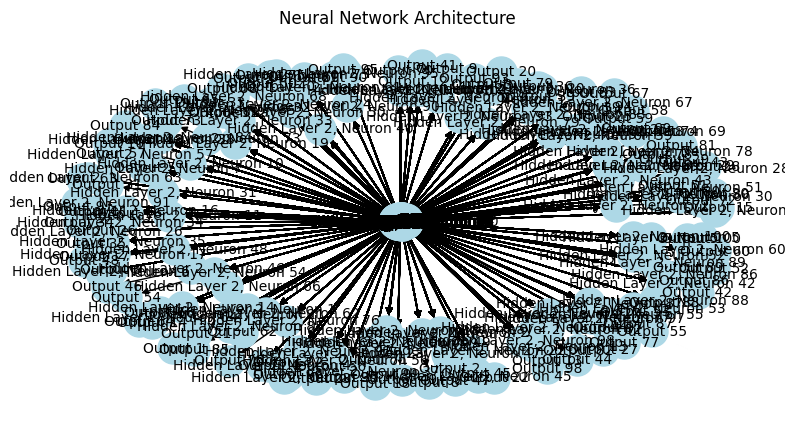

Classification 
               precision    recall  f1-score   support

    positive       0.81      0.82      0.81      6754
    negative       0.82      0.80      0.81      6746

    accuracy                           0.81     13500
   macro avg       0.81      0.81      0.81     13500
weighted avg       0.81      0.81      0.81     13500

confusion
 [[5548 1206]
 [1338 5408]]
accuracy: 
 0.8115555555555556
None


array(['positive', 'negative', 'positive', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [106]:
train_mlp_classifier(word2vec,df)